In [1]:
import os
#from pathlib import Path

# HOME_DIR = str(Path.home())
HOME_DIR = 'D:/jupyter_dir'

ANNO_DIR = os.path.join(HOME_DIR, 'DLCV/data/balls_n_person/annotations')
IMAGE_DIR = os.path.join(HOME_DIR, 'DLCV/data/balls_n_person/images')

In [2]:
%cd D:\jupyter_dir\DLCV\data\balls_n_person\annotations
!cat 000aa58056ae2b02.xml

D:\jupyter_dir\DLCV\data\balls_n_person\annotations
<annotation>
  <folder>Football_Tennis_ball_Person</folder>
  <filename>000aa58056ae2b02.jpg</filename>
  <path>D:\jupyter_dir\DLCV\data\OIDv4_ToolKit\OID\Dataset\train\Football_Tennis_ball_Person\000aa58056ae2b02.jpg</path>
  <source>
    <database>Unknown</database>
  </source>
  <size>
    <width>683</width>
    <height>1024</height>
    <depth>3</depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>Tennis_ball</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
      <xmin>372</xmin>
      <ymin>101</ymin>
      <xmax>391</xmax>
      <ymax>120</ymax>
    </bndbox>
  </object>
</annotation>


In [3]:
import glob
import xml.etree.ElementTree as ET

classes_map = {'Football':0, 'Tennis_ball':1, 'Person':2}

# voc xml -> yolo csv
def xml_to_csv(path, output_filename):
    xml_list = []
    # xml 확장자 가진 모든 파일의 절대경로로 xml_file할당
    with open(output_filename, 'w') as train_csv_file:
        for xml_file in glob.glob(path + '/*.xml'):
            # xml file parsing and make Element Tree - extract object information
            tree = ET.parse(xml_file)
            root = tree.getroot()
            full_image_name = os.path.join(IMAGE_DIR, root.find('filename').text)
            value_str_list = ' '
            for obj in root.findall('object'):
                xmlbox = obj.find('bndbox')
                class_name = obj.find('name').text
                x1 = int(xmlbox.find('xmin').text)
                y1 = int(xmlbox.find('ymin').text)
                x2 = int(xmlbox.find('xmax').text)
                y2 = int(xmlbox.find('ymax').text)
                class_id = classes_map[class_name]
                value_str = f'{x1},{y1},{x2},{y2},{class_id}'
                value_str_list += value_str + ' '
            train_csv_file.write(full_image_name + value_str_list + '\n')

In [4]:
xml_to_csv(ANNO_DIR, os.path.join(ANNO_DIR, 'ballnperson_anno.csv'))

In [5]:
!cat ballnperson_anno.csv

D:/jupyter_dir\DLCV/data/balls_n_person/images\000aa58056ae2b02.jpg 372,101,391,120,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\0012ca60c774547e.jpg 462,166,483,187,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\001a8a1a132eeed0.jpg 392,426,405,438,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\001a98cdcee83e16.jpg 168,253,214,280,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\003742607cd6cc51.jpg 647,384,658,397,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00400701ea92d1d2.jpg 234,477,282,526,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\005e1e38ce277f78.jpg 455,378,502,435,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\0080284307d979d2.jpg 0,184,102,299,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00a8d854441ef854.jpg 90,544,193,638,0 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00c0076b670e711b.jpg 486,337,588,440,1 
D:/jupyter_dir\DLCV/data/balls_n_person/images\00c3e62fb6726082.jpg 461,152,479,170,1 462,149,481,172,1 
D:/jupyter_dir\DLCV/data/bal

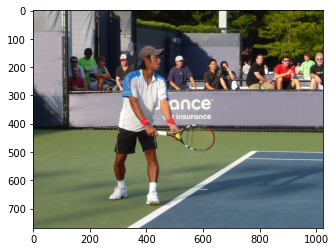

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(IMAGE_DIR, '87abdf7d3d089cb4.jpg')), cv2.COLOR_BGR2RGB))

In [7]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [8]:
import sys, os

LOCAL_PACKAGE_DIR = 'D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3'.replace('\\', '/')
print(LOCAL_PACKAGE_DIR)
sys.path.append(LOCAL_PACKAGE_DIR)

D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3


In [9]:
%cd D:/jupyter_dir/DLCV/Detection/yolo/keras-yolo3
#!wget https://pjreddie.com/media/files/yolov3.weights

!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3


Using TensorFlow backend.
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:529

conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolutional_14
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_15
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_5
Parsing section convolutio

__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, None, None, 1 512         conv2d_21[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_21 (LeakyReLU)      (None, None, None, 1 0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, None, None, 2 294912      leaky_re_lu_21[0][0]             
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, None, None, 2 1024        conv2d_22[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, None, None, 2 0           batch_normalization_22[0][0]     
__________

In [10]:
from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

In [11]:
# modify ballnperson_classes.txt
BASE_DIR = os.path.join(HOME_DIR, 'DLCV/Detection/yolo/keras-yolo3')
classes_path = os.path.join(BASE_DIR, 'model_data/ballnperson_classes.txt')
with open(classes_path, 'w') as f:
    f.write('Football\nTennis_ball\nPerson')

!cat D:\jupyter_dir\DLCV\Detection\yolo\keras-yolo3\model_data\ballnperson_classes.txt

Football
Tennis_ball
Person


In [12]:
from train import get_classes, get_anchors
from train import create_model, data_generator, data_generator_wrapper

BASE_DIR = os.path.join(HOME_DIR, 'DLCV/Detection/yolo/keras-yolo3')

## annotation file path, epoch model save path, object class file path, anchor file path
annotation_path = os.path.join(ANNO_DIR, 'ballnperson_anno.csv')
log_dir = os.path.join(BASE_DIR, 'snapshots/ballnperson/')
classes_path = os.path.join(BASE_DIR, 'model_data/ballnperson_classes.txt')
anchors_path = os.path.join(BASE_DIR, 'model_data/yolo_anchors.txt')

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
print(class_names, num_classes)
print(anchors)

['Football', 'Tennis_ball', 'Person'] 3
[[ 10.  13.]
 [ 16.  30.]
 [ 33.  23.]
 [ 30.  61.]
 [ 62.  45.]
 [ 59. 119.]
 [116.  90.]
 [156. 198.]
 [373. 326.]]


#### Set parameters for yolo model training as config class 
if necessary, modifying and train

In [13]:
# read csv annotation file and convert to list ( lines )
with open(annotation_path) as f:
    lines = f.readlines()
    
class config:
    #initial weights
    initial_weights_path=os.path.join(BASE_DIR, 'model_data/yolo.h5' )
    # input_shape는 고정. 
    input_shape=(416, 416)
    # epochs는 freeze, unfreeze 2 step에 따라 설정. 
    first_epochs=50
    first_initial_epochs=0
    second_epochs=100
    second_initial_epochs=50
    # batch size, train,valid count, epoch steps   
    batch_size = 4
    val_split = 0.1   
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val
    train_epoch_steps = num_train//batch_size 
    val_epoch_steps =  num_val//batch_size
    
    anchors = get_anchors(anchors_path)
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    # epoch시 저장된 weight 파일 디렉토리 
    log_dir = os.path.join(BASE_DIR, 'snapshots/ballnfish/')
    
print('Class name:', config.class_names,'\nNum classes:', config.num_classes)

Class name: ['Football', 'Tennis_ball', 'Person'] 
Num classes: 3


#### csv file -> data_generator_wrapper objects for train and vaild data   
fit_generator()의 인자

In [14]:
def create_generator(lines):
    
    train_data_generator = data_generator_wrapper(lines[:config.num_train], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes)
    
    valid_data_generator = data_generator_wrapper(lines[config.num_train:], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes)
    
    return train_data_generator, valid_data_generator

pretrained weights로 yolo model 반환

In [15]:
def create_yolo_model():
    is_tiny_version = len(config.anchors)==6 
    if is_tiny_version:
        model = create_tiny_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
    else:
        model = create_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
        
    return model

#### callbacks

In [16]:
def create_callbacks():
    logging = TensorBoard(log_dir=config.log_dir)
    checkpoint = ModelCheckpoint(config.log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                 monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
    
    # return as list
    return [logging, checkpoint, reduce_lr, early_stopping]

## train

In [17]:
train_data_generator, valid_data_generator = create_generator(lines)
ballnperson_model = create_yolo_model()
callbacks_list = create_callbacks()

print('### First train start ###')
ballnperson_model.compile(optimizer=Adam(lr=1e-3), loss={'yolo_loss':lambda y_true, y_pred: y_pred})
ballnperson_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                                validation_data= valid_data_generator, validation_steps = config.val_epoch_steps,
                                epochs=config.first_epochs, initial_epoch=config.first_initial_epochs, callbacks=callback_list)

ballnperson_model.save_weights(log_dir + 'trained_weights_stage_1.h5')

for i in range(len(ballnperson_model.layers)):
    ballnperson_model.layers[i].trainable = True
    
print('### Second train start ###')
ballnperson_model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss':lambda y_true, y_pred: y_pred})
ballnperson_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                                validation_data= valid_data_generator, validation_steps = config.val_epoch_steps,
                                epochs=config.second_epochs, initial_epoch=config.second_initial_epochs, callbacks=callback_list)

ballnperson_model.save_weights(log_dir + 'trained_weights_final.h5')

Instructions for updating:
Colocations handled automatically by placer.
Create YOLOv3 model with 9 anchors and 3 classes.


AttributeError: 'str' object has no attribute 'decode'

In [23]:
import keras
import tensorflow as tf
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
2.2.1
1.13.1


In [26]:
#import HDF5
import h5py
print(h5py.__version__)

3.1.0
